# Preprocessing

## Importing Libraries and Datasets

In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from mlxtend.preprocessing import minmax_scaling

In [272]:
df = pd.read_csv("https://raw.githubusercontent.com/DnYAlv/Scholarship-ML-Final-Project/main/Dataset/train.csv", index_col = "id")
df = df.drop("Unnamed: 0", axis=1)
df = df.sort_values('id', ascending=True)
df_test = pd.read_csv("https://raw.githubusercontent.com/DnYAlv/Scholarship-ML-Final-Project/main/Dataset/test.csv", index_col = "id")
df_test = df_test.drop("Unnamed: 0", axis=1)
df_test = df_test.sort_values('id', ascending=True)

In [273]:
df_test.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


In [274]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,,,
1,Male,disloyal Customer,48,Business travel,Business,821,3,3,3,3,5,3,5,5,3,2,5,4,5,5,2,5.0,neutral or dissatisfied
2,Female,Loyal Customer,35,Business travel,Business,821,2,2,2,2,3,5,4,5,5,5,5,3,5,5,26,39.0,satisfied
3,Male,Loyal Customer,41,Business travel,Business,853,4,4,4,4,5,5,5,3,3,3,3,4,3,5,0,0.0,satisfied
4,Male,Loyal Customer,50,Business travel,Business,1905,2,2,2,2,4,4,5,5,5,5,5,3,5,4,0,0.0,satisfied
5,Female,Loyal Customer,49,Business travel,Business,3470,3,3,3,3,4,5,4,3,3,4,3,3,3,5,0,1.0,satisfied


In [275]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,103904.0,39.379706,15.114964,7.0,27.0,40.0,51.0,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.0,843.0,1743.0,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.0,3.0,4.0,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.0,3.0,4.0,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.0,3.0,4.0,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.0,3.0,4.0,5.0
Seat comfort,103904.0,3.439396,1.319088,0.0,2.0,4.0,5.0,5.0
Inflight entertainment,103904.0,3.358158,1.332991,0.0,2.0,4.0,4.0,5.0


In [276]:
df.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [277]:
df.shape

(103904, 23)

## Deleting NaN values

In [278]:
df = df.dropna().copy()

- We are dropping the NaN values because of these values could affect our model in the future. In the other hand, dropping about 300 rows from more than 100k rows will not give significant effect.

In [279]:
df.shape

(103594, 23)

- We still have more than 100k data after deleting **Missing Values**

In [280]:
df_test.isnull().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [281]:
df_test = df_test.dropna().copy()

- We are doing the same thing to the test datasets.

In [282]:
df_test.shape

(25893, 23)

## Handling Outliers

In [283]:
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000
mean,39.380466,1189.325202,2.729753,3.060081,2.756984,2.977026,3.202126,3.250497,3.439765,3.358341,3.382609,3.351401,3.631687,3.304323,3.640761,3.286397,14.747939,15.178678
std,15.113125,997.297235,1.327866,1.525233,1.398934,1.277723,1.329401,1.349433,1.318896,1.333030,1.288284,1.315409,1.181051,1.265396,1.175603,1.312194,38.116737,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,842.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


- From data above, we can see that **Departure and Arrival Delay in Minutes** have outliers that need to be handled.

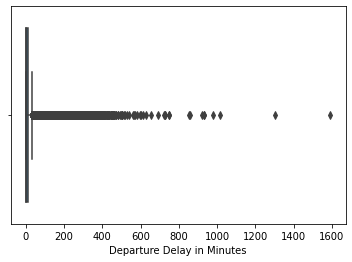

In [284]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Departure Delay in Minutes'])
plt.show()

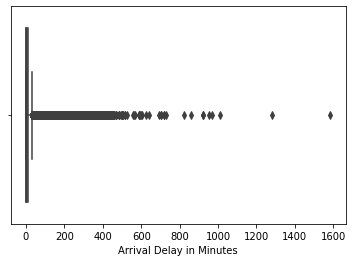

In [285]:
sns.boxplot(x=df['Arrival Delay in Minutes'])
plt.show()

- From 2 plots above, we can conclude that both of these outliers are the same rows. We also found that there are new outliers (about 1300), we need to handle this too.

In [286]:
df.loc[df['Departure Delay in Minutes'] > 1100]
df.loc[df['Arrival Delay in Minutes'] > 1100]

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,,,
69661,Male,Loyal Customer,32,Business travel,Business,2916,2,2,2,2,5,5,5,3,4,5,4,5,3,5,1305,1280.0,satisfied
73471,Female,Loyal Customer,47,Personal Travel,Eco,1120,2,2,2,3,2,4,2,2,4,4,4,2,3,2,1592,1584.0,neutral or dissatisfied


In [287]:
df.drop(df[df['Arrival Delay in Minutes'] > 1100].index, inplace=True)

- We only drop Arrival Delay in minutes since these both outliers are in the same rows

## Changing Categorical Variables to Numerical

In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103592 entries, 1 to 129880
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103592 non-null  object 
 1   Customer Type                      103592 non-null  object 
 2   Age                                103592 non-null  int64  
 3   Type of Travel                     103592 non-null  object 
 4   Class                              103592 non-null  object 
 5   Flight Distance                    103592 non-null  int64  
 6   Inflight wifi service              103592 non-null  int64  
 7   Departure/Arrival time convenient  103592 non-null  int64  
 8   Ease of Online booking             103592 non-null  int64  
 9   Gate location                      103592 non-null  int64  
 10  Food and drink                     103592 non-null  int64  
 11  Online boarding                    1035

- There are object dtypes in our dataset such as **Gender**, **Customer Type**, **Type of Travel**, and **Class**

### Encoding the object dtypes variables

In [293]:
df['Gender'] = df['Gender'].apply({'Male':1, 'Female':0}.get)
df['Customer Type'] = df['Customer Type'].apply({'disloyal Customer':0, 'Loyal Customer':1}.get)
df['Type of Travel'] = df['Type of Travel'].apply({'Business travel':1, 'Personal Travel':0}.get)
df['Class'] = df['Class'].apply({'Business':2, 'Eco Plus':1, 'Eco':0}.get)

- We are changing the variable to numerical so that our model can encode it better

In [294]:
df['satisfaction'] = df['satisfaction'].apply({'satisfied':1, 'neutral or dissatisfied':0}.get)

In [295]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,,,
1,1,0,48,1,2,821,3,3,3,3,5,3,5,5,3,2,5,4,5,5,2,5.0,0
2,0,1,35,1,2,821,2,2,2,2,3,5,4,5,5,5,5,3,5,5,26,39.0,1
3,1,1,41,1,2,853,4,4,4,4,5,5,5,3,3,3,3,4,3,5,0,0.0,1
4,1,1,50,1,2,1905,2,2,2,2,4,4,5,5,5,5,5,3,5,4,0,0.0,1
5,0,1,49,1,2,3470,3,3,3,3,4,5,4,3,3,4,3,3,3,5,0,1.0,1


- Now the object type has been changed to numerical type

In [296]:
df_test['Gender'] = df_test['Gender'].apply({'Male':1, 'Female':0}.get)
df_test['Customer Type'] = df_test['Customer Type'].apply({'disloyal Customer':0, 'Loyal Customer':1}.get)
df_test['Type of Travel'] = df_test['Type of Travel'].apply({'Business travel':1, 'Personal Travel':0}.get)
df_test['Class'] = df_test['Class'].apply({'Business':2, 'Eco Plus':1, 'Eco':0}.get)
df_test['satisfaction'] = df_test['satisfaction'].apply({'satisfied':1, 'neutral or dissatisfied':0}.get)

- We are doing the same to our test data

In [297]:
df_test.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,,,
17,0,1,48,0,0,821,2,3,2,3,1,5,1,5,5,2,5,5,5,2,0,0.0,0
20,0,1,42,0,0,821,3,3,3,4,1,3,4,1,1,3,1,3,1,3,4,0.0,0
35,1,1,39,1,2,1672,2,2,2,2,5,4,5,3,3,4,5,5,3,5,23,17.0,1
44,1,1,51,1,2,2077,4,1,4,4,2,5,5,5,5,5,5,5,5,4,0,1.0,1
49,1,0,20,1,0,108,4,5,4,1,5,4,3,5,5,4,5,5,4,5,0,29.0,0


In [298]:
df.to_csv('train.csv',index=False)

In [299]:
df_test.to_csv('test.csv', index=False)